In [1]:
import pandas as pd
import numpy as np

In [2]:
ATLAS_tsv="/mnt/larry/lilian/DATA/ATLAS/ATLAS.tsv"
#load ATLAS dataset
ATLAS_df=pd.read_csv(ATLAS_tsv, sep="\t")


In [12]:
#get sub df where column true_PDB is not Nan
ATLAS_real_pdb_df=ATLAS_df[ATLAS_df['true_PDB'].notna()]
print("\nNumber of entries with true PDB:", len(ATLAS_real_pdb_df))



Number of entries with true PDB: 115


In [14]:
#Of these real crystal structures, we want to subdivide in human non-human, MHC class 1 or 2
all_MHC_names=list(ATLAS_real_pdb_df['MHCname'].unique())
print(all_MHC_names)

['HLA-B*08:01', 'HLA-A*02:01', 'HLA-B*35:01', 'HLA-DRA*01:01 | HLA-DRB1*04:01', 'HLA-E*01:01', 'HLA-B*44:05', 'HLA-B*08:01 ', 'HLA-B*35:08', 'HLA-DQA1*01:02 | HLA-DQB1*05:01', 'HLA-A*24:02', 'HLA-DQA1*03:01 | HLA-DQB1*03:02', 'HLA-DRA*01:01 | HLA-DRB3*0301', 'HLA-B*51:01', 'HLA-DQA1*05:01 | HLA-DQB1*02:01', 'HLA-B*27:05', 'HLA-DRA*01:01 | HLA-DRB1*01:01', 'H-2Kb', 'H-2Kbm8', 'H-2Ld', 'I-Ek', 'I-Ab']


In [15]:

# --- 1. Human MHC Class I ---
human_mhc_1_prefixes = ('HLA-A', 'HLA-B','HLA-C', 'HLA-E', 'HLA-F', 'HLA-G')
human_mhc_1_df = ATLAS_real_pdb_df[
    ATLAS_real_pdb_df['MHCname'].str.startswith(human_mhc_1_prefixes)
].copy()

# --- 2. Human MHC Class II ---
human_mhc_2_prefixes = ('HLA-DR', 'HLA-DQ', 'HLA-DP')
human_mhc_2_df = ATLAS_real_pdb_df[
    ATLAS_real_pdb_df['MHCname'].str.startswith(human_mhc_2_prefixes)
].copy()

# --- 3. Mouse MHC Class I ---
mouse_mhc_1_prefixes = ('H-2K', 'H-2D', 'H-2L')
mouse_mhc_1_df = ATLAS_real_pdb_df[
    ATLAS_real_pdb_df['MHCname'].str.startswith(mouse_mhc_1_prefixes)
].copy()

# --- 4. Mouse MHC Class II ---
mouse_mhc_2_prefixes = ('I-A', 'I-E')
mouse_mhc_2_df = ATLAS_real_pdb_df[
    ATLAS_real_pdb_df['MHCname'].str.startswith(mouse_mhc_2_prefixes)
].copy()

print(f"Human MHC Class I records: {len(human_mhc_1_df)}")
print(f"Human MHC Class II records: {len(human_mhc_2_df)}")
print(f"Mouse MHC Class I records: {len(mouse_mhc_1_df)}")
print(f"Mouse MHC Class II records: {len(mouse_mhc_2_df)}")

Human MHC Class I records: 83
Human MHC Class II records: 12
Mouse MHC Class I records: 13
Mouse MHC Class II records: 7


Successfully generated 'human_mhc_locus_frequency_colored_sorted_bar_plot.png'


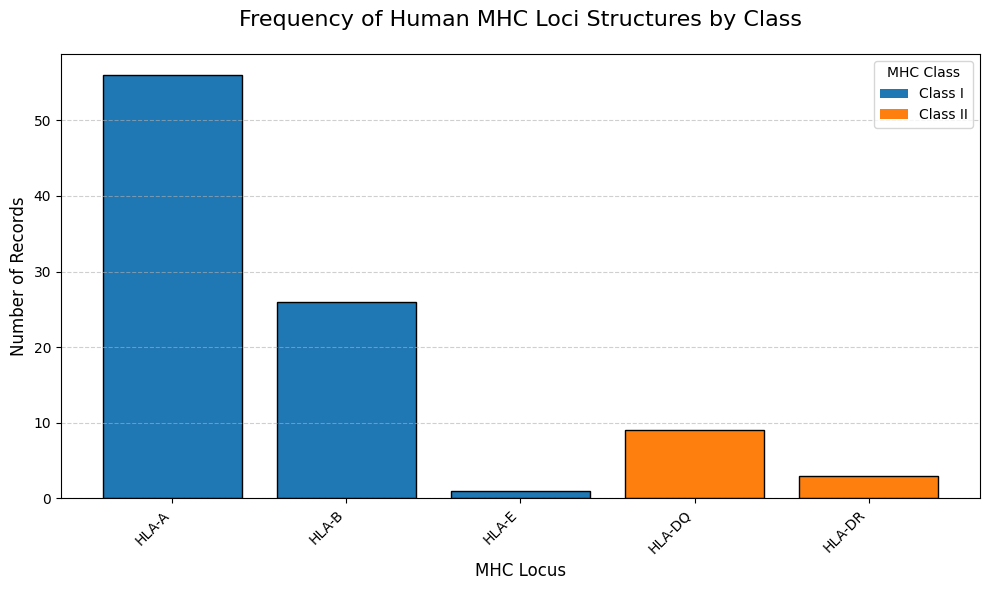

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Initial Filtering (Code copied from your prompt for a single runnable block) ---
# Assuming ATLAS_real_pdb_df is already defined and loaded.

# Human MHC Class I
human_mhc_1_prefixes = ('HLA-A', 'HLA-B','HLA-C', 'HLA-E', 'HLA-F', 'HLA-G')
human_mhc_1_df = ATLAS_real_pdb_df[
    ATLAS_real_pdb_df['MHCname'].str.startswith(human_mhc_1_prefixes)
].copy()

# Human MHC Class II
human_mhc_2_prefixes = ('HLA-DR', 'HLA-DQ', 'HLA-DP')
human_mhc_2_df = ATLAS_real_pdb_df[
    ATLAS_real_pdb_df['MHCname'].str.startswith(human_mhc_2_prefixes)
].copy()

# --- 2. Combine Human DataFrames ---
human_mhc_df = pd.concat([human_mhc_1_df, human_mhc_2_df], ignore_index=True)

# --- 3. Extract Locus and Class Type ---

# Define conditions for the different loci
# This list is used to extract the 'MHC_Locus' for the x-axis label.
locus_conditions = [
    human_mhc_df['MHCname'].str.startswith(locus_prefix)
    for locus_prefix in ['HLA-A', 'HLA-B', 'HLA-C', 'HLA-E', 'HLA-F', 'HLA-G', 'HLA-DR', 'HLA-DQ', 'HLA-DP']
]
locus_choices = [
    'HLA-A', 'HLA-B', 'HLA-C', 'HLA-E', 'HLA-F', 'HLA-G', 'HLA-DR', 'HLA-DQ', 'HLA-DP'
]

human_mhc_df['MHC_Locus'] = np.select(locus_conditions, locus_choices, default='Other')


# Define conditions for the different MHC Classes
class_conditions = [
    human_mhc_df['MHCname'].str.startswith(human_mhc_1_prefixes),
    human_mhc_df['MHCname'].str.startswith(human_mhc_2_prefixes)
]
class_choices = ['Class I', 'Class II']

human_mhc_df['MHC_Class'] = np.select(class_conditions, class_choices, default='Other')

# --- 4. Count Frequencies and Prepare for Plotting ---
# Count records by Locus
locus_counts = human_mhc_df.groupby(['MHC_Locus', 'MHC_Class']).size().reset_index(name='Count')

# Define custom sorting order (Class I, then Class II) and secondary sort (by Count descending)
# We use a categorical type for stable sorting
class_order = pd.CategoricalDtype(['Class I', 'Class II'], ordered=True)
locus_counts['MHC_Class'] = locus_counts['MHC_Class'].astype(class_order)

# Sort the data frame: Class I first, then by count within that class
locus_counts_sorted = locus_counts.sort_values(by=['MHC_Class', 'Count'], ascending=[True, False])

# --- 5. Generate and Save Bar Plot ---

# Prepare data for plotting
labels = locus_counts_sorted['MHC_Locus']
counts = locus_counts_sorted['Count']

# Define colors based on the sorted classes
color_map = {'Class I': '#1f77b4', 'Class II': '#ff7f0e'} # Blue for I, Orange for II
colors = [color_map[c] for c in locus_counts_sorted['MHC_Class']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=colors, edgecolor='black')

plt.title('Frequency of Human MHC Loci Structures by Class', fontsize=16, pad=20)
plt.xlabel('MHC Locus', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Create a custom legend based on the colors
legend_handles = [plt.Rectangle((0,0), 1, 1, fc=color_map[c]) for c in color_map]
plt.legend(legend_handles, color_map.keys(), title='MHC Class', loc='upper right')

plt.tight_layout()

# Save the plot
plt.savefig('human_mhc_locus_frequency_colored_sorted_bar_plot.png')
print("Successfully generated 'human_mhc_locus_frequency_colored_sorted_bar_plot.png'")

In [21]:
#temperature in df
MHC1_temps = human_mhc_1_df['Temperature_K'].unique()
print("Unique temperatures in Human MHC Class I dataset:", MHC1_temps)
MHCII_temps = human_mhc_2_df['Temperature_K'].unique()
print("Unique temperatures in Human MHC Class II dataset:", MHCII_temps)

Unique temperatures in Human MHC Class I dataset: [298.15 298.  ]
Unique temperatures in Human MHC Class II dataset: [298.15]


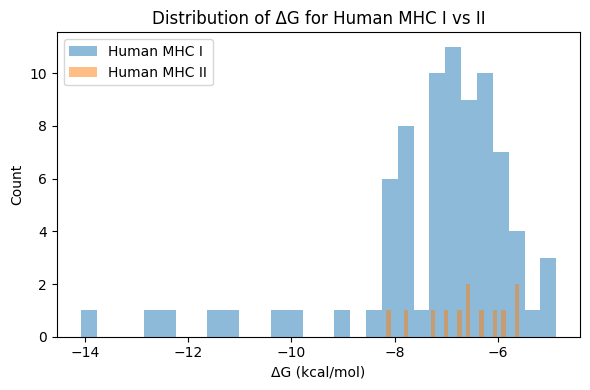

In [28]:
import matplotlib.pyplot as plt

# ΔG distributions
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(
    pd.to_numeric(human_mhc_1_df["DeltaG_kcal_per_mol"].dropna(),errors='coerce'),
    bins=30,
    alpha=0.5,
    label="Human MHC I"
)
ax.hist(
    pd.to_numeric(human_mhc_2_df["DeltaG_kcal_per_mol"].dropna(), errors='coerce'),
    bins=30,
    alpha=0.5,
    label="Human MHC II"
)

ax.set_xlabel("ΔG (kcal/mol)")
ax.set_ylabel("Count")
ax.set_title("Distribution of ΔG for Human MHC I vs II")
ax.legend()
plt.tight_layout()
plt.show()


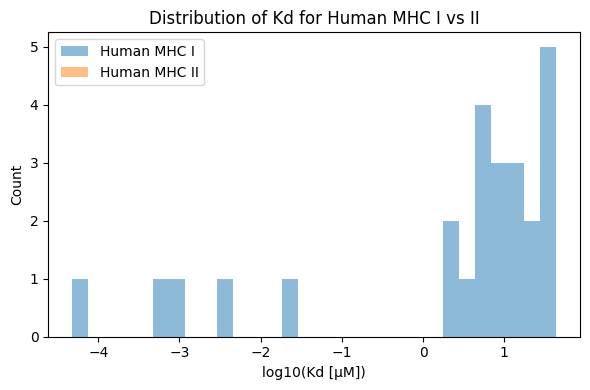

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Drop NaNs and non-positive values (log10 undefined for <= 0)
kd1 = human_mhc_1_df["Kd_microM"].dropna()
#make str values into float
kd1 = pd.to_numeric(kd1, errors='coerce')
kd1 = kd1[kd1 > 0]
kd2 = human_mhc_2_df["Kd_microM"].dropna()
kd2= pd.to_numeric(kd2, errors='coerce')
kd2 = kd2[kd2 > 0]

fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(
    np.log10(kd1),
    bins=30,
    alpha=0.5,
    label="Human MHC I"
)
ax.hist(
    np.log10(kd2),
    bins=30,
    alpha=0.5,
    label="Human MHC II"
)

ax.set_xlabel("log10(Kd [µM])")
ax.set_ylabel("Count")
ax.set_title("Distribution of Kd for Human MHC I vs II")
ax.legend()
plt.tight_layout()
plt.show()
